In [1]:
from pathlib import Path

import pyparsing as pp

mess_inp_file = Path("01_1-2_mess.inp")

In [2]:
from importlib import reload

from mess_io_proto import surface

reload(surface)

surf = surface.from_mess(mess_inp_file)
max_path = surface.longest_path(surf)
max_path

[NMolWell(id=3, energy=5.87, type='nmol', names=['C5H8(522)', 'HO2(8)'], interacting=False, fake=False),
 Barrier(well_ids=(1, 3), name='FakeB-C5H8(522)+HO2(8)', energy=5.87, fake=True),
 NMolWell(id=1, energy=2.87, type='nmol', names=['C5H8(522)', 'HO2(8)'], interacting=True, fake=True),
 Barrier(well_ids=(0, 1), name='ts_1_1', energy=15.29, fake=False),
 UnimolWell(id=0, energy=0.0, type='unimol', name='S(722)r0'),
 Barrier(well_ids=(0, 2), name='ts_1_2', energy=10.94, fake=False),
 NMolWell(id=2, energy=-20.95, type='nmol', names=['C5H8O(825)rs', 'OH(4)'], interacting=True, fake=True),
 Barrier(well_ids=(2, 4), name='FakeB-C5H8O(825)rs+OH(4)', energy=-17.95, fake=True)]

<Figure size 1000x500 with 0 Axes>

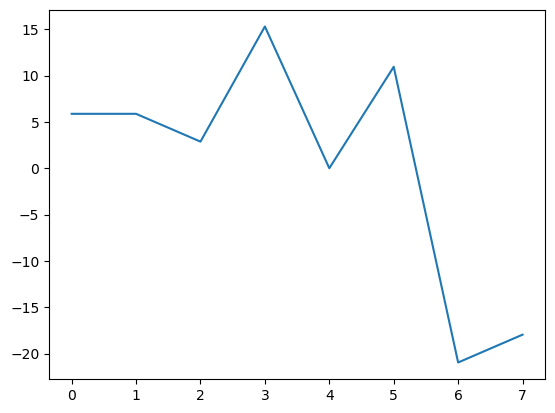

In [3]:
from importlib import reload

from matplotlib import pyplot

reload(surface)


size = (10, 5)
fig = pyplot.figure(figsize=size)
fig = pyplot.figure()
ax = fig.add_subplot(1, 1, 1)  # here is where you add the subplot to f

surface.plot_path(max_path, ax)